# Reinforcement Learning

## Implement Reinforcement Learning using an example of a maze environment that the agent needs to explore. 

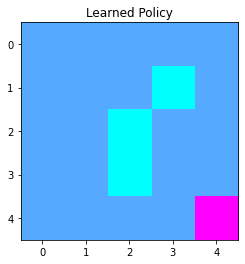

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the maze environment
class Maze:
    def __init__(self, size, start, goal, walls):
        self.size = size
        self.start = start
        self.goal = goal
        self.walls = walls
        self.state = start

    def reset(self):
        self.state = self.start
        return self.state

    def is_terminal(self):
        return self.state == self.goal

    def get_possible_actions(self):
        actions = ['up', 'down', 'left', 'right']
        x, y = self.state
        if x == 0:
            actions.remove('up')
        if x == self.size[0] - 1:
            actions.remove('down')
        if y == 0:
            actions.remove('left')
        if y == self.size[1] - 1:
            actions.remove('right')
        return actions

    def take_action(self, action):
        x, y = self.state
        if action == 'up':
            new_state = (x - 1, y)
        elif action == 'down':
            new_state = (x + 1, y)
        elif action == 'left':
            new_state = (x, y - 1)
        elif action == 'right':
            new_state = (x, y + 1)
        else:
            raise ValueError("Invalid action")
        
        if new_state in self.walls or not (0 <= new_state[0] < self.size[0] and 0 <= new_state[1] < self.size[1]):
            new_state = self.state
        
        self.state = new_state
        reward = 1 if self.state == self.goal else -0.01
        return new_state, reward

    def render(self):
        maze = np.zeros(self.size)
        maze[self.goal] = 2
        for wall in self.walls:
            maze[wall] = -1
        maze[self.state] = 1
        plt.imshow(maze, cmap='cool', vmin=-1, vmax=2)
        plt.show()

# Q-learning algorithm
class QLearning:
    def __init__(self, maze, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.maze = maze
        # Fixed number of actions ('up', 'down', 'left', 'right')
        self.q_table = np.zeros((*maze.size, 4))  # Fixed to 4 actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.actions = ['up', 'down', 'left', 'right']  # Fixed actions

    def choose_action(self, state):
        possible_actions = self.maze.get_possible_actions()  # Get possible actions for the current state
        if np.random.rand() < self.epsilon:
            return np.random.choice(possible_actions)  # Choose a valid random action
        else:
            # Only select the action with the highest Q-value from possible actions
            action_values = {action: self.q_table[state[0], state[1], self.actions.index(action)] for action in possible_actions}
            return max(action_values, key=action_values.get)

    def update_q_table(self, state, action, reward, next_state):
        action_idx = self.actions.index(action)
        best_next_action = np.max(self.q_table[next_state[0], next_state[1]])
        self.q_table[state[0], state[1], action_idx] += self.alpha * (reward + self.gamma * best_next_action - self.q_table[state[0], state[1], action_idx])

    def train(self, episodes):
        for _ in range(episodes):
            state = self.maze.reset()
            while not self.maze.is_terminal():
                action = self.choose_action(state)
                next_state, reward = self.maze.take_action(action)
                self.update_q_table(state, action, reward, next_state)
                state = next_state


# Main execution
if __name__ == "__main__":
    size = (5, 5)
    start = (0, 0)
    goal = (4, 4)
    walls = [(2, 2), (3, 2), (1, 3)]
    
    maze = Maze(size, start, goal, walls)
    q_learning = QLearning(maze, alpha=0.1, gamma=0.9, epsilon=0.1)
    q_learning.train(1000)
    
    # Visualization of the learned policy
    policy = np.full(size, '', dtype=object)
    for i in range(size[0]):
        for j in range(size[1]):
            state = (i, j)
            if state == goal:
                policy[i, j] = 'G'
            elif state in walls:
                policy[i, j] = 'W'
            else:
                action_idx = np.argmax(q_learning.q_table[i, j])
                policy[i, j] = q_learning.actions[action_idx][0].upper()
    
    plt.imshow(np.where(policy == 'W', -1, np.where(policy == 'G', 2, 0)), cmap='cool', vmin=-1, vmax=2)
    plt.title('Learned Policy')
    plt.show()